In [1]:
import sys
import numpy as np
import math
from IPython.display import Image
import timeit
import pandas as pd
import seaborn as sns

In [2]:
sys.version_info

sys.version_info(major=3, minor=8, micro=8, releaselevel='final', serial=0)

In [3]:
np.__version__

'1.20.1'

In [4]:
if sys.platform == 'darwin' :
    print(" Mac OS")
else :
    print(" Windows ")

 Windows 


# 1. 텐서 구분 알아보기

           다차원 배열은 수학이나 물리학에서 tensor로 구성합니다.
           정수나 실수 등은 scalar로 물리량만 존재하지 방향이 없습니다. 그래서 0차원 텐서입니다.
           벡터는 물리량과 방향이 있는 1차원 텐서입니다.
           텐서는 기본으로 벡터가 기본 원소로 구성됩니다. 2차원인 행렬은 실제 벡터를 원소로 구성합니다.
           
           3차원일 경우는 내부는 2차원인 행렬을 원소로 구성합니다.
           

## 1-1 배열 알아보기

        배열은 하나의 자료형으로 원소를 구성합니다.
        파이썬 리스트는 object 자료형을 기준으로 원소를 구성합니다.
        

### 리스트도 하나의 배열입니다. 

In [10]:
l = [1,2,3,4]

In [11]:
l[0]

1

In [12]:
l[-1]

4

## 1-2 다차원 배열은 넘파이 모듈을 이용해서 만듭니다.

###  텐서 0차 : 스칼라 알아보기 

        scalar는 일반적인 숫자형입니다. 
        배열을 구성하면 텐서로 처리됩니다.
        

In [13]:
s = np.array(10)

In [14]:
s

array(10)

#### 차원이 0 차원 

In [15]:
s.ndim

0

In [17]:
type(s)

numpy.ndarray

### 텐서 1차원 : 벡터 알아보기

        텐서 1차가 벡터이며 파이썬에서는 1차원 배열로 벡터를 표시합니다.
        

####  하나의 차원을 가진 정수값 리스트를 인자로 전달해서 다차원 배열에서 1차원 배열을 만듭니다.

In [18]:
v = np.array([1,2,3,4])

In [19]:
v

array([1, 2, 3, 4])

#### 1차원 

In [20]:
v.ndim

1

###### 자원은 4로 나온다

In [21]:
v.shape

(4,)

#### 넘파이의 다차원 배열 클래스는 ndarray 입니다.

In [22]:
type(v)

numpy.ndarray

###  텐서 2차 : 행렬 알아보기

         행렬은 2차원 배열입니다. 텐서 2차이면 이 이름이 행렬입니다.
         

In [23]:
m = np.array([[1,2,3],[4,5,6]])

In [24]:
m

array([[1, 2, 3],
       [4, 5, 6]])

#### 2차원 

In [25]:
m.ndim

2

#### 2, 3 차원 배열임을 나타내는 것. * 요것을 자원이라고 부르는 듯 함.

In [28]:
m.shape

(2, 3)

#### 다차원 배열의 클래스는 벡터와 동일한 ndarray 클래스의 객체입니다.

In [29]:
type(m)

numpy.ndarray

###  텐서  3차원 이상 : 별도의 명칭이 없음  

         3차원 이상은 별도의 이름이 없어 텐서 3차라 부릅니다.
         

In [30]:
c = np.array([[[1,2,3],[4,5,6]], [[7,8,9],[10,11,12]]])

In [31]:
c

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

#### 3 차원
- 몇 차원인지 나타내는 모듈 " ndim "

In [32]:
c.ndim

3

#### 여기서는 3차원 배열인데 2, 2, 3 의 배열임

In [33]:
c.shape

(2, 2, 3)

#### type 체크를 해보면 numpy.ndarray 로 나온다.

In [34]:
type(c)

numpy.ndarray

# 2. 다차원 배열 구조 알아보기

            넘파이의 다차원 배열은 ndarray 클래스에 의해 만들어진 객체입니다.
            이 클래스의 특징은 1차원 데이터를 관리합니다.  메타정보를 이용해서 이 1차원 데이터를 다양한 차원 데이터 뷰플 보여줍니다.
            
            데이터를 관리하는 영역과 메타정보를 관리하는 영역을 분리해서 처리해서 보다 신속한 계산을 처리합니다.
            

## 2-1 다차원 배열의 메타 정보 알아보기

        하나의 자료형만을 가져야 하므로 자료형을 있습니다.
        이 배열에 대한 크기, 하나의 원소에 대한 크기 등을 가집니다.
        
        또한 차원이나 모양 등을 구성합니다.

#### 모든 배열은 내부 원소에 대한 자료형을 가지고 있음 

In [109]:
c.dtype

dtype('int32')

#### 배열의 크기 및 원소 하나의 크기

In [110]:
c.size

12

#### 배열 원소 하나의 바이트 수
- 4byte 라는 걸 나타냄

In [111]:
c.itemsize

4

#### 총 바이트 수

In [112]:
c.shape

(2, 2, 3)

#### 사이즈는 12 , 원소는 4니깐  총 값은 48byte

In [113]:
c.shape[2]

3

In [114]:
# 2 * 2 * 3 = 12
# 거기서 아이템 사이즈를 곱하니깐 48ㅇㅣ 나온다.
c.shape[0] * c.shape[1] * c.shape[2] * c.itemsize

48

#### 배열을 확장할 때 메모리 상에서 확장되는 정보

### strides의 개념
     행렬 c의 구조에서 strides는 아래와 같다
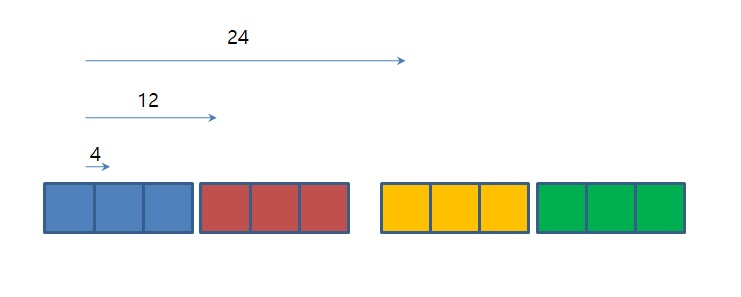

In [693]:
# 원소 1에서 하나가 더 늘어나면 아이템 사이즈가 늘어난다. 
# 3을 가진 배열이지만 4byte 로 나타난다.
c = np.array([[[1,2,3],[4,5,6]], [[7,8,9],[10,11,12]]])

In [694]:
# strides 는 용량의 간격을 나타낸다.
# 그래서 24 byte는 위에서보면 배열의 3차원의 총 용량을 나타내고,
# 12 byte는 2차원의 총 용량을 나타내고,
# 4 byte는 1차원의 총 용량을 나타낸다.
c.strides

(24, 12, 4)

In [117]:
c.shape

(2, 2, 3)

In [118]:
c.shape[0] * c.strides[0]

48

#### 메모리에 있는 데이터 확인 : 

In [119]:
c

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [120]:
c.data

#### 내부 값 확인 

In [121]:
c.data.obj

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [122]:
c.flat

In [123]:
# 아래에서 d_c 를 만들어서
# c 의 첫번째 차원이 d_c 가 된다.

c

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

#### 특정 정보를 별도의 변수에 할당해서 새로운 사본이 생기지 않습니다

In [124]:
# 넘파이의 특징 : 사본으로 원본에 영향을 끼칠 수 있다.
# 판다스의 특징 : 사본이 생겨도 원본에 영향을 주지 않는다.
d_c = c[0]
d_c

array([[1, 2, 3],
       [4, 5, 6]])

In [125]:
d_c.base

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

# 3. 다차원 배열 인덱스 및 슬라이스 검색

            파이썬 리스트는 단순히 인덱스 위치 정보를 가지고 검색이 가능합니다.
            넘파이 모듈은 검색 내에 배열을 넣어서 추가적인 검색도 가능합니다.
            
            이 배열이 정보가 논리값일 수도 있고 정수일 수도 있습니다. 
            이런 검색을 슬라이스에 연결해서 사용도 가능하도록 확장되었습니다.
            

### 3-1 다차원 배열 인덱스 검색도 원본을 유지

In [126]:
c

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [127]:
c.shape

(2, 2, 3)

#### 배열의 첫번째 정보를 읽어오면 2차원 배열이 들어옴  

In [128]:
# 결국 cc 는 c의 첫번째 차원을 가져와서 reference 한다.
cc = c[0]

In [129]:
cc[0] = 999

In [130]:
# 결국 원본 c 에 영향을 끼치는 사본 cc가 만들어진다
# 즉 c 에서 떼어져 나온게 아니라 그 안에 포함된 사본인 cc가 생성
cc

array([[999, 999, 999],
       [  4,   5,   6]])

In [131]:
c

array([[[999, 999, 999],
        [  4,   5,   6]],

       [[  7,   8,   9],
        [ 10,  11,  12]]])

In [132]:
c[0][0] = 1,2,3

In [133]:
c

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [134]:
cc.shape

(2, 3)

####  새로운 변수에 할당하면 원본도 변경이 됩니다

In [135]:
cc

array([[1, 2, 3],
       [4, 5, 6]])

In [136]:
cc[0] = 999

In [137]:
cc

array([[999, 999, 999],
       [  4,   5,   6]])

In [138]:
c

array([[[999, 999, 999],
        [  4,   5,   6]],

       [[  7,   8,   9],
        [ 10,  11,  12]]])

### 3-2 다차원 배열 슬라이스는 원본을 유지

         리스트에서 슬라이스 하면 새로운 사본을 만들지만 다차원 배열은 슬라이스를 해도 원본을 유지합니다.
         이런 이유는 다차원 배열은 대량의 원소를 메모리 상에 올라가 있으므로 다시 사본을 만들면 많은 메모리가 소비됩니다.
         
         그래서 슬라이스도 원본을 참조하는 방식으로 만들어져 있습니다.
         

#### 모든 데이터를 슬라이스로 처리

In [161]:
# " : "는 물결 표시(~) 와 같다. c[시작:끝]
# 만약 c[1:9] 라고 범위를 주면 실제로는 1~8까지 된다.
# 결국 끝에서 -1 한 값이 표시된다.

# 처음부터 끝까지를 나타낸다.
d = c[:]

In [162]:
d.base

array([[[ 3,  3,  3],
        [ 3,  3,  3]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [163]:
# 넘파이는 원본에 영향을 주는 사본을 만든다.
d[0]=3
d

array([[[ 3,  3,  3],
        [ 3,  3,  3]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [164]:
# d를 바꾸면 c도 바뀐다 이말씀
c

array([[[ 3,  3,  3],
        [ 3,  3,  3]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

####  새로운 객체가 만들어진다

In [165]:
# 근데 객체를 비교해보면 새로운 객체가 만들어진다.
# 왠지 그럼 포인터형식으로 c의 그부분을 나타내는 사본이 만들어지는듯하죠??
d is c

False

In [166]:
d != c

array([[[False, False, False],
        [False, False, False]],

       [[False, False, False],
        [False, False, False]]])

In [167]:
# 안의 데이터들을 까보면 같다.
d == c 

array([[[ True,  True,  True],
        [ True,  True,  True]],

       [[ True,  True,  True],
        [ True,  True,  True]]])

#### 데이터를 관리하는 메모리는 공유한다 

In [168]:
d.base is c

True

In [170]:
# 넘파이에서 공유되고 있는지 확인하는 모듈

np.may_share_memory(d, c)

True

# 4. 추가된 검색 알아보기

    배열의 값으로 내부의 원소를 검색
    
    이 검색의 특징은 새로운 배열을 만든다.
    

### 4-1 논리 검색

        특정 원소를 검색해서 추출하기 위해 논리값이 True 일 경우만 추출합니다.
        이때 길이가 동일한 논리값을 가지는 배열을 만들어서 검색해야 합니다.
        

In [171]:
# lll에 np.array를 저장한다.

lll = np.array([1,2,3,4,5,])

In [172]:
lll

array([1, 2, 3, 4, 5])

#### 배열의 원소가 3보다 큰 경우 처리하면 큰 경우만 True로 표시

In [173]:
# 배열의 원소 (즉, 데이터값) 이 3보다 큰경우를 나타내는 논리

con = lll > 3

In [174]:
con

array([False, False, False,  True,  True])

#### 검색연산자에 논리 배열을 넣으면 검색이 됩니다.

In [701]:
l4 = lll[lll>2]

In [702]:
l4

array([3, 4, 5])

In [703]:
# 3보다 큰값, 즉 배열에서의 4~ 을 추출해내는 코딩

l4 = lll[con]

#### 논리 검색은 새로운 사본을 만들어서 원본가 연결고리가 없습니다.


In [714]:
con = lll > 4

l4 = con

l4

array([False, False, False, False,  True])

In [715]:
l4.base

In [716]:
l4 is lll

False

#### 논리 검색된 결과를 변경해도 원본은 변경되지 않습니다.


In [717]:
# 아까 하던거랑 다르게 원본이 변하지않는 방식이 있는데
# 논리 검색을 해서 떼낸 사본은 원본에 영향을 주지앟는다.
# 전처리 과정에서 대부분 원본에 영향을 주지 않는 방향으로 만드는 것이 최고다

l4[0] = 7777

In [718]:
l4

array([ True, False, False, False,  True])

In [719]:
lll

array([1, 2, 3, 4, 5])

## 4-2 팬시 검색

      배열 내의 원소를 검색할 때 정수형 배열을 만들어서 검색이 가능합니다. 
      이때도 논리 검색과 동일하게 새로운 사본을 만들어서 처리합니다.
      

In [720]:
lll

array([1, 2, 3, 4, 5])

#### 동일한 인덱스 정보를 넣고 추출하기

In [721]:
f = [0,1,0,1,1]

In [722]:
lll

array([1, 2, 3, 4, 5])

In [723]:
lll[[0,1,0,1,1]]

array([1, 2, 1, 2, 2])

In [724]:
lll[f]

array([1, 2, 1, 2, 2])

#### 다른 인덱스 정보를 넣어서 추출합니다

In [200]:
f1 = [4,3,2,1,0]

In [201]:
l5 = lll[f1]

In [202]:
l5

array([5, 4, 3, 2, 1])

#### 새로운 사본이 만들어져서 갱신해도 원본에 영향이 없습니다.

In [208]:
# base : 사본의 원본을 찾는 모듈

l5.base

In [209]:
l5 is lll

False

In [210]:
l5[0] = 666

In [211]:
l5

array([666,   4,   3,   2,   1])

In [212]:
lll

array([1, 2, 3, 4, 5])

# 5. 다차원 배열 자료형 처리하기

           하나 자료형을 관리하기 위해서 다양한 자료형을 제공합니다.
           
           이런 이유는 배열의 데이터를 관리하는 기준이 c언어와 동일하므로 하나의 원소의 길이를 지정할 세부적인 자료형이 필요합니다.
           이 자료형으로 지정하면 한 바이트부터 여러바이트로 구성이 가능해서 실제 메모리 사용도 줄일 수 있습니다.
           
           

## 5-1 다차원 배열의 자료형은 하나의 객체를 보관

         다차원 배열을 만들기 위해 dtype 클래스를 제공합니다.
         

#### 넘파이에 자료형을 만드는 클래스가 별도로 존재 

In [213]:
np.dtype

numpy.dtype

#### 자료형을 관리하는 객체를 생성합니다.

In [215]:
# dt 의 dtype을 np.int8 로 저장함

dt = np.dtype(np.int8)

In [216]:
dt

dtype('int8')

In [217]:
isinstance(dt, np.dtype)

True

#### 자료형도 하나의 객체이므로 내부의 속성들을 확인합니다

In [218]:
dt.str

'|i1'

In [219]:
dt.char

'b'

In [220]:
dt.type

numpy.int8

In [221]:
dt.kind

'i'

In [222]:
dt.num

1

In [223]:
dt.descr

[('', '|i1')]

### 5-2 특정 자료형 객체로 다차원 배열을 생성

       자료형을 지정하지 않으면 원소들을 확인해서 특정 자료형으로 처리합니다.
       인자 dtype을 자료형을 지정하면 이 자료형으로 변경됩니다.
       

In [235]:
b = np.array([1,2,3,4])

In [236]:
b

array([1, 2, 3, 4])

In [232]:
a = np.array([1,2,3,4], dtype = dt)

In [233]:
a

array([1, 2, 3, 4], dtype=int8)

In [239]:
# dtype 은 data type을 나타내는거 같죠?
a.dtype

dtype('int8')

In [240]:
b.dtype

dtype('int32')

In [246]:
# int8로 지정해서 1byte로 출력된다.
a.itemsize

1

In [247]:
# int32 라서 4byte로 출력된다.
b.itemsize

4

In [248]:
# 1차원 배열이다~ 라는 것을 나타낸다
a.strides

(1,)

In [266]:
b = np.array([[1,2,3,4],[5,6,7,8]])

In [267]:
b

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

In [268]:
b.dtype

dtype('int32')

In [275]:
b.itemsize

4

In [276]:
# 아니다. 얘는 byte를 나타낸다 ㅋㅋ;
# 아.. 젤 오른쪽부터 차원순의 byte (용량) 을 나타내는 거같네
# 그래서 2차원은 16byte, 1차원은 4byte

b.strides

(16, 4)

# 6.  유니버셜 함수 알아보기

             다차원 배열의 원소가 많기 때문에 각 원소별로 계산을 하려면 순환문을 작성해야 하지만 유니버셜 함수는 기본으로 벡터화 연산을 지원하므로 
             실제 순환문없이 모든 원소의 계산을 수행합니다.
             
             

### +, -, *, /, //, %, <, >, ==
- 요런걸 많이쓴다

## 6-1 유니버셜 함수란

     순환문 없이 모든 원소들을 자동으로 순환하면서 처리하는 함수 입니다.
    

### 파이썬 함수도 객체이므로 유니버셜 함수도 객체입니다.

       이 말은 해당되는 클래스가 존재합니다.

In [277]:
np.ufunc

numpy.ufunc

#### 넘파이 내의 함수의 클래스가 유니버셜 함수인지를 확인합니다.

In [278]:
type(np.add) == np.ufunc

True

#### 넘파이 모듈 내에 있는 유니버셜 함수를 확인합니다.

In [279]:
count = 0
for i,v in np.__dict__.items() :
    if type(v) == np.ufunc :
        print(i, end=", ")
        count += 1
    
    if count > 0  and count % 5  == 0 :
        print()

bitwise_not, matmul, absolute, add, arccos, 
arccosh, arcsin, arcsinh, arctan, arctan2, 
arctanh, bitwise_and, bitwise_or, bitwise_xor, cbrt, 
ceil, conj, conjugate, copysign, cos, 
cosh, deg2rad, degrees, divide, divmod, 

equal, exp, exp2, expm1, fabs, 
floor, floor_divide, float_power, fmax, fmin, 
fmod, frexp, gcd, greater, greater_equal, 
heaviside, hypot, invert, isfinite, isinf, 
isnan, isnat, lcm, ldexp, left_shift, 
less, less_equal, log, log10, log1p, 
log2, logaddexp, logaddexp2, logical_and, logical_not, 
logical_or, logical_xor, maximum, minimum, mod, 
modf, multiply, negative, nextafter, not_equal, 

positive, power, rad2deg, radians, reciprocal, 
remainder, right_shift, rint, sign, signbit, 
sin, sinh, spacing, sqrt, square, 
subtract, tan, tanh, true_divide, trunc, 

















































































































































































































### 6-2   파이썬은 연산자를 가지고 처리할 때 클래스 내부의 스페셜 메소드로 처리

#### 파이썬 연산자를 함수로 처리하는 모듈 

In [282]:
# op는 numpy보다 빠르긴한데, 로그 함수가 없어서 실제 작업할 땐 잘 쓰지 않는다.

import operator as op

operator 연산자 관련 자료
https://docs.python.org/3.8/library/operator.html

In [283]:
dir(op)

['__abs__',
 '__add__',
 '__all__',
 '__and__',
 '__builtins__',
 '__cached__',
 '__concat__',
 '__contains__',
 '__delitem__',
 '__doc__',
 '__eq__',
 '__file__',
 '__floordiv__',
 '__ge__',
 '__getitem__',
 '__gt__',
 '__iadd__',
 '__iand__',
 '__iconcat__',
 '__ifloordiv__',
 '__ilshift__',
 '__imatmul__',
 '__imod__',
 '__imul__',
 '__index__',
 '__inv__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__irshift__',
 '__isub__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__loader__',
 '__lshift__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__mul__',
 '__name__',
 '__ne__',
 '__neg__',
 '__not__',
 '__or__',
 '__package__',
 '__pos__',
 '__pow__',
 '__rshift__',
 '__setitem__',
 '__spec__',
 '__sub__',
 '__truediv__',
 '__xor__',
 '_abs',
 'abs',
 'add',
 'and_',
 'attrgetter',
 'concat',
 'contains',
 'countOf',
 'delitem',
 'eq',
 'floordiv',
 'ge',
 'getitem',
 'gt',
 'iadd',
 'iand',
 'iconcat',
 'ifloordiv',
 'ilshift',
 'imatmul',
 'imod',
 'imul',
 'index',
 'indexOf',
 'inv',
 'inv

In [305]:
op.add

<function _operator.add(a, b, /)>

#### 1차원 배열을 만드는 arrange 함수를 이용해서 원소 5개를 가진 배열을 만듭니다.

       0번부터 만들어지므로 4까지만 만들어집니다.

In [306]:
a = np.arange(5)

In [307]:
a

array([0, 1, 2, 3, 4])

#### 이 객체에도 __add__ 메소드가 있습니다. 

        이 메소드는 + 연산자를 처리하는 메소드입니다.

In [308]:
a.__add__

<method-wrapper '__add__' of numpy.ndarray object at 0x000001D5643FDB10>

#### 파이썬 연산자를 재구현한 add 함수를 호출할 경우에도 넘파이의 유니버셜 처리가 됩니다.

         이런 이유는 각 클래스에 정의된 스페셜 메소드를  호출하므로 넘파이의 스페셜 메소드가 처리됩니다.
         

In [309]:
(1).__add__

<method-wrapper '__add__' of int object at 0x00007FFA32F12730>

In [310]:
op.add(1,1)

2

In [311]:
# 밑에 op.add(a,a) 보다 메모리 차지하는 것도 적고, 속도도 빨라서 보통 op를 잘 안쓴다 ㅋㅋ
a + a

array([0, 2, 4, 6, 8])

In [312]:
# a = [0,1,2,3,4] 였기 때문에 
# [0,1,2,3,4] + [0,1,2,3,4] 가 되서 각 원소별로 더해진 값이 출력된다.

op.add(a,a)

array([0, 2, 4, 6, 8])

In [314]:
a.__add__(a)

array([0, 2, 4, 6, 8])

### 6-3  파이썬 리스트의 덧셈 연산자는 리스트를 결합

        리스트의 덧셈연산은 두 개의 리스트를 연결합니다.
        다차원 배열의 덧셈은 두 개의 배열의 각각의 원소를 더합니다.

#### 리스트의 덧셈
- 배열과 다르게 더해지는게 아니라 추가가 된다.

In [316]:
l = [1,2,3,4]

In [317]:
l.__add__

<method-wrapper '__add__' of list object at 0x000001D564419940>

In [318]:
l.__add__(l)

[1, 2, 3, 4, 1, 2, 3, 4]

In [319]:
op.add(l,l)

[1, 2, 3, 4, 1, 2, 3, 4]

In [322]:
# 이쪽도 이 친구가 젤 빠르고 젤 간단해서 얘를 젤 많이 쓴다.

l + l 

[1, 2, 3, 4, 1, 2, 3, 4]

#### 다차원 배열의 덧셈 

In [326]:
# 리스트를 array로 바꾸는 것
# np.array 
# l이라는 리스트를 ll이라는 배열로 바꿈.

ll = np.array(l)

In [329]:
# 그렇게 되면 배열처럼 값이 더해진다.

op.add(ll,ll)

array([2, 4, 6, 8])

In [330]:
ll+ll

array([2, 4, 6, 8])

In [331]:
np.add(ll,ll)

array([2, 4, 6, 8])

In [332]:
def test():
    #big_array = np.random.randint(1,100,size=10)
    
    return np.multiply(94283874,845758696)

def test2():
    #big_array = np.random.randint(1,100,size=10)
    return op.mul(94283874,845758696)

def test3():
    #big_array = np.random.randint(1,100,size=10)
    
    return 94283874*845758696

def test4():
    #big_array = np.random.randint(1,100,size=10)
    
    return (94283874).__mul__(845758696)

t1 = timeit.timeit('test()', setup='from __main__ import test', number=1000000)
t2 = timeit.timeit('test2()', setup='from __main__ import test2', number=1000000)
t3 = timeit.timeit('test3()', setup='from __main__ import test3', number=1000000)
t4 = timeit.timeit('test4()', setup='from __main__ import test4', number=1000000)

print(t1)
print(t2)
print(t3)
print(t4)

1.6562705000001188
0.22521789999973407
0.10045249999984662
0.2685491999995975


### 연산자와 op모듈, 빌트인 모듈의 속도 차이를 계산해봅니다.

In [334]:
def test():
    #big_array = np.random.randint(1,100,size=10)
    
    return np.add(94283874,845758696)

def test2():
    #big_array = np.random.randint(1,100,size=10)
    return op.add(94283874,845758696)

def test3():
    #big_array = np.random.randint(1,100,size=10)
    
    return 94283874+845758696

def test4():
    #big_array = np.random.randint(1,100,size=10)
    
    return (94283874).__add__(845758696)

t1 = timeit.timeit('test()', setup='from __main__ import test', number=1000000)
t2 = timeit.timeit('test2()', setup='from __main__ import test2', number=1000000)
t3 = timeit.timeit('test3()', setup='from __main__ import test3', number=1000000)
t4 = timeit.timeit('test4()', setup='from __main__ import test4', number=1000000)

print(t1)
print(t2)
print(t3)
print(t4)

1.2759240000000318
0.22345289999975648
0.10681619999968461
0.23373679999986052


### 모듈간 속도 차이
- 사칙연산을 직접적으로 쓰는게 젤 빠르다
- 근데 로그는 numpy를 써라.

In [336]:
np.log(1)

0.0

## 6-4 브로드캐스팅 처리

        다차원 배열을 처리하려면 두 배열의 원소의 개수를 일치시켜야 합니다.
        
        이를 자동으로 맞춰주는 과정이 브로드캐스팅입니다.
        

#### 스칼라의 브로드캐스팅

In [337]:
aa = np.arange(5)

In [338]:
aa

array([0, 1, 2, 3, 4])

In [340]:
# 각 원소에 값을 더해주는 브로드캐스팅 처리법 

aa + 5

array([5, 6, 7, 8, 9])

In [342]:
# 이것도 똑같다.. 원소별로 지정해줘서 더해주는것 

aa + [5,5,5,5,5]

array([5, 6, 7, 8, 9])

In [362]:
# 배열을 만들어주는 numpy 모듈의 기능
# 지정한 값 -1 의 배열을 만들어준다 
# 시작값 ~ 끝값

np.arange(1, 9)

array([1, 2, 3, 4, 5, 6, 7, 8])

In [363]:
# arange 는 뭘까?
# reshape 는 차원을 나눠주는 것
# 지금 a2에는 0~9 까지의 원소가 들어가는데
# 그 원소를 5개씩, 2차원으로 나누라는 뜻 (행 : 2, 열: 5)

a2 = np.arange(10).reshape(2,5)

In [364]:
a2

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

In [365]:
# 아까 위에서 적어놓은 것처럼 작성할 수 있는데,
# 결국 10이고, 그걸 2차원 5배열로 만든다는 뜻.

a2 = np.arange(2*5).reshape(2,5)
a2

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

### 매트릭스 행렬..

In [361]:
# 요렇게 변수로 용량, 간격을 정해줄 수 있따.

r = 4
c = 5

a2 = np.arange(r*c).reshape(r, c)
a2

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])

#### 벡터의 브로드캐스팅

In [367]:
aa + a2

array([[ 0,  2,  4,  6,  8],
       [ 5,  7,  9, 11, 13]])

In [368]:
aa_b = np.array([aa,aa])

In [369]:
aa_b

array([[0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4]])

In [370]:
a2 + aa_b

array([[ 0,  2,  4,  6,  8],
       [ 5,  7,  9, 11, 13]])

#### 행벡터와 열벡터를 계산할 때는 두 개의 벡터의 행과 열의 크기로 확대 

In [375]:
a_r = np.arange(1*6).reshape(1,6)

In [377]:
a_r

array([[0, 1, 2, 3, 4, 5]])

In [382]:
# arange 는 뭘까?
# reshape 는 차원을 나눠주는 것
# 지금 a2에는 0~9 까지의 원소가 들어가는데
# 그 원소를 5개씩, 2차원으로 나누라는 뜻 (행 : 2, 열: 5)

# 확인할라고 또 가지고왔다!
# 6 = 6개의 배열을 만들고, 6개의 행으로 나눠라. 하나의 열로??

a_c = np.arange(6*1).reshape(6,1)

In [384]:
# 하나의 열로 나눠졌다.

a_c

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5]])

In [386]:
# 요건 각 열별로 a_r 의 np 계산법을 통해서
# 값을 각각 넣어준다.

a_c + a_r

array([[ 0,  1,  2,  3,  4,  5],
       [ 1,  2,  3,  4,  5,  6],
       [ 2,  3,  4,  5,  6,  7],
       [ 3,  4,  5,  6,  7,  8],
       [ 4,  5,  6,  7,  8,  9],
       [ 5,  6,  7,  8,  9, 10]])

## 6-5 numpy 기초 사용법

        기본적으로 알아두어야될 사용법이 있습니다.
        
        자주 사용하니 여러번 활용해 보시기 바랍니다.
        

### 제로 행렬 만들기

In [392]:
# 원소가 0인 것들만 넣을 때 사용 하는 것.

r=5
c=5
num=np.zeros((r,c))
num

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [395]:
# size 는 원소 갯수

np.size(num)

25

In [397]:
# 차원 구조를 보면 5,5 차원 (행 : 5 , 열 : 5)

num.shape

(5, 5)

### 1 행렬 만들기

In [399]:
# ones 를 넣으면 각 원소들이 전부다 1로 들어간다.

one=np.ones((5,5))
one

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

### 매트릭스 만들기

In [400]:
mat=np.matrix([[100,200],[300,400]])
mat

matrix([[100, 200],
        [300, 400]])

In [401]:
mat2=np.array([[100,200],[300,400]])
mat2

array([[100, 200],
       [300, 400]])

In [404]:
# 매트릭스를 만들어라

n=3
m=4
A = np.arange(n*m)
A

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [405]:
# 3행에 4열로 나눠라.

A.reshape((n,m))

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [726]:
n=3
m=4
A = np.arange(n*m).reshape((n,m))
A

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [732]:
n=0
m=7
A = np.arange(n,m)
A.reshape(7,1)

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6]])

In [417]:
x=4
y=1
A.reshape((x,y))

array([[3],
       [4],
       [5],
       [6]])

### 가우시안 정규 분포 난수
- random 함수로 난수를 생성한다.

In [449]:
# 가우시안 정규 분포 난수 생성
# 얘는 Go랑 다르게 행 :3, 열 :4 를 나타낸다.

R = np.random.randn(3, 4)
R

array([[ 0.00763176,  1.20403394,  0.63343913,  1.56194646],
       [ 2.52225367,  0.24495771, -0.52969785, -1.26298182],
       [-1.04485635, -0.03466592, -0.88925426,  1.68579589]])

In [450]:
# 0에서 1사이 균일 분포 난수 생성
R = np.random.rand(3, 4)
R

array([[0.62571485, 0.92114719, 0.45838493, 0.55307963],
       [0.53465219, 0.82630388, 0.07276152, 0.74833535],
       [0.3817383 , 0.55350938, 0.45827025, 0.08003223]])

### 행렬에 값 치환/추출

In [456]:
a=np.array([0,0,0,0,0,0,0,0,0,0])
a

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [457]:
a=np.array([0,0,0,0,0,0,0,0,0,0])
a[0]=3
a[1]=5
a[7]=10
a

array([ 3,  5,  0,  0,  0,  0,  0, 10,  0,  0])

In [463]:
# 0이 아닌 값의 index 확인
# 0번째, 1번째, 7번째의 value는 0이 아니다.

np.nonzero(a)

(array([0, 1, 7], dtype=int64),)

In [471]:
# 행렬을 거꾸로 추출합니다.


a[::-1]

array([ 0,  0, 10,  0,  0,  0,  0,  0,  5,  3])

In [733]:
# 랜덤 난수 생성

n=4
m=3
r=np.random.rand(n,m)
r

array([[0.83081379, 0.1245154 , 0.65724858],
       [0.09660263, 0.63010891, 0.24079498],
       [0.18224018, 0.80423741, 0.94940212],
       [0.94585684, 0.25756486, 0.70259538]])

In [734]:
# 난수에서 최소, 최대값을 찾을때 사용함.


r.min(), r.max()

(0.0966026333070954, 0.9494021217357543)

In [735]:
# 각 행에서 최대값을 나타내는 열
# 각 행 (row) 에서 최대값을 찾아낸다.

np.argmax(r,axis=1)

array([0, 1, 2, 0], dtype=int64)

In [736]:
# 각 열에서 최대값을 나타내는 행

np.argmax(r,axis=0)

array([3, 2, 2], dtype=int64)

In [739]:
# 축 = 행, 열을 지정하지 않으면
# 모든 인덱스 중 가장 큰 값을 가진 인덱스를 뽑아낸다.

np.argmax(r)

8

In [487]:
# 평균, 총합을 뽑아내는 함수들

r.mean(), r.sum()

(0.4046851208969666, 4.8562214507635995)

In [505]:
# n~m은 랜덤 정수의 범위, l은 난수 생성 개수
# np.random.randint는 list 형태로 도출됨


n=-5
m=10
l=11

# n 부터 m 까지의 범위, l만큼의 갯수를 나타냄
# -5에서 9 까지 범위인데, 11개의 난수를 뽑아 낸다.
r1=np.random.randint(n,m,l)
r2=np.random.randint(n,m,l)
print(r1,r2)

[ 5  2  0  7  5  3  0  9  7 -4  5] [-1  6  1  4 -4  4  8  3 -5 -1  9]


In [507]:
# r1과 r2 간 공통값 추출

np.intersect1d(r1,r2)

array([-4,  3,  9])

In [508]:
# 1만 뽑아낸 5x5 매트릭스

one=np.ones((5,5))
one

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [509]:
# 각 행과 열의 위치의 값을 치환할 수 있음
# : 은 범위를 나타냄 시작 값은 포함되고 마지막 값은 포함되지 않음
# 첫행과 첫열은 0으로 시작한다
# 1행부터 3행까지, 1열부터 3열까지의 범위를 수정함.

one[1:4,1:4]=0
print(one)

[[1. 1. 1. 1. 1.]
 [1. 0. 0. 0. 1.]
 [1. 0. 0. 0. 1.]
 [1. 0. 0. 0. 1.]
 [1. 1. 1. 1. 1.]]


In [746]:
one=np.ones((10,10))
one

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [748]:
one[3:10,3:10]=0
print(one)

[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 0. 0. 0. 0. 0. 0. 0.]]


In [516]:
z=np.zeros((5,5))
z

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [524]:
#  :: 은 일정 간격을 나타낸다.
# 시작 값은 포함되고 시작 값이 없는 경우 0으로 간주한다.
# 마지막 값은 어떤 간격으로 입력되는지를 의미한다.
z=np.zeros((5,5))

# 0행에서 1부터.. 2의 간격으로
z[0,1::2]=1

# 1행에서 0부터 2의 간격으로
z[1,::2]=1

# 2행에서 1부터.. 2의 간격으로
z[2,1::2]=1

# 3행에서 0부터 2의 간격으로
z[3,::2]=1

# 4행에서 1부터 2의 간격으로
z[4,1::2]=1

# 값을 치환해서 프린트해본다.
print(z)

[[0. 1. 0. 1. 0.]
 [1. 0. 1. 0. 1.]
 [0. 1. 0. 1. 0.]
 [1. 0. 1. 0. 1.]
 [0. 1. 0. 1. 0.]]


# 7. 선형대수 계산하기

## 7-1 벡터의 내적 구하기

       내적은 두 벡터 간의 어떤 방향을 유지하는 지를 표시합니다.
       
       내젹이 양수이고 커지면 두 벡터가 유사한 방향을 가지는 것을 알 수 있습니다.
       내젹이 0이면 수직입니다. 내적이 음수이면 반대 방향을 알 수 있습니다.
       

       2차원 x 2차원 행렬의 내적은 아래와 같이 구할 수 있다.

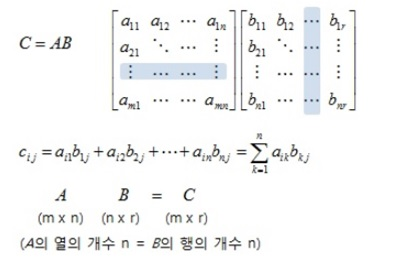

- a11 ~ a1n 까지와 a11~ an1 까지 구하고, 그 값들을 구하는 것

- c11 = a11 * b11 + a12 * b21 + ...... + a1n * bn1 
- c21 = a21 * b11 + a22 * b21 + ...... + a2n * bn1
.
.
.
.
- cmr = am1 * b1r + am2 * b2r + am3 * b3r + ... ... + amn * bnr

결론 : c = m * r 행렬

### 1차원 행렬의 경우 내적에 사용되는 dot과 sumproduct에 사용되는 inner의 결과가 같다.

### 내적

- c11 = a11 * b11 + a12 * b21 + ... + a1n * bn1
- c21 = a21 * b11 + a22 * b21 + ... + a2n * bn1
- ...
- cmr = am1 * b1r + am2 * b2r + ... + amn * bnr

### 내적 사용 이유
- 딥러닝 시 사용한다.
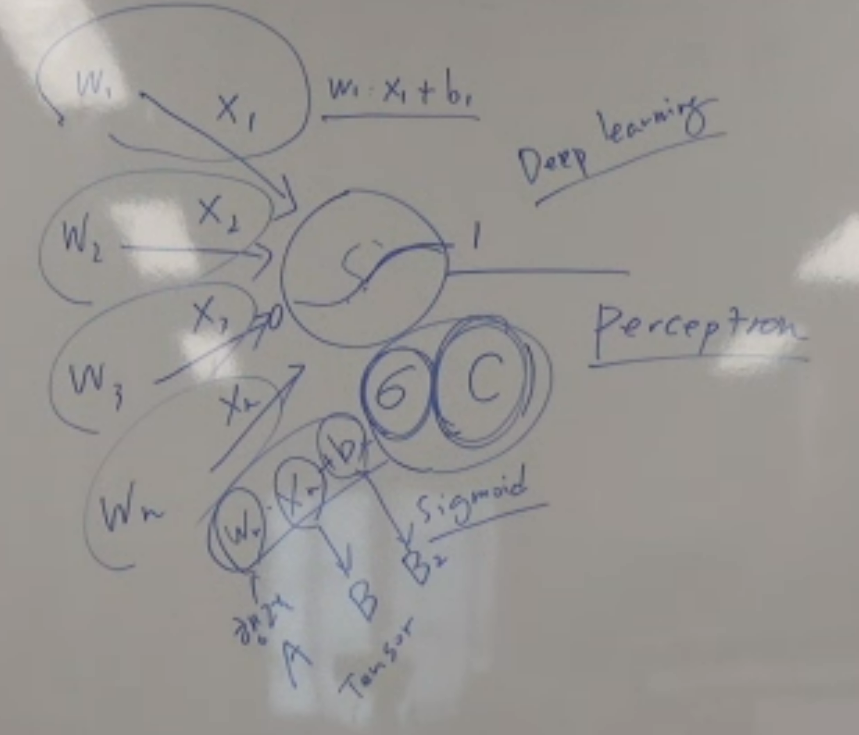

In [754]:
a = np.arange(1,5)
a

array([1, 2, 3, 4])

In [755]:
b = np.arange(3,7)
b

array([3, 4, 5, 6])

In [756]:
c = np.array([[3],
              [4],
              [5],
              [6]])
c

array([[3],
       [4],
       [5],
       [6]])

#### dot 연산 처리

In [757]:
a.dot(b)

50

In [758]:
np.dot(a,b)

50

In [759]:
np.dot(a,c)

array([50])

#### inner 함수 처리 

In [760]:
# 1D array를 내적할때  dot과 동일한 결과가 나오나 2D 이상에서는 내적의 결과가 아닌 sumproduct 값이 도출됨.
np.inner(a,b)

50

In [761]:
np.inner(a,c)

ValueError: shapes (4,) and (1,4) not aligned: 4 (dim 0) != 1 (dim 0)

In [762]:
c = np.array([1,-2,3])

In [763]:
d = np.array([0,-3,3])

In [764]:
np.dot(c,d)

15

## 행렬곱 처리하기

        행렬 내의 벡터들이 내적을 가지고 다시 행렬을 구성합니다.
        
        dot, matmul 두 개를 지원합니다.
        

### 1차 텐서 닷 연산

In [765]:
n=5
A = np.arange(1*n).reshape((1,n))
A

array([[0, 1, 2, 3, 4]])

In [766]:
B =np.arange(n*1).reshape((n,1))
B

array([[0],
       [1],
       [2],
       [3],
       [4]])

In [767]:
np.dot(A,B)

array([[30]])

In [768]:
np.inner(A,B)

ValueError: shapes (1,5) and (1,5) not aligned: 5 (dim 1) != 1 (dim 0)

### 2차 텐서 닷 연산

In [773]:
n=3
m=5
A = np.arange(n*m).reshape((n,m))
A

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [774]:
B =np.arange(m*n).reshape((m,n))
B

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11],
       [12, 13, 14]])

In [777]:
# 내적결과
# 내적은 행과 열이 달라도 가능하지만

np.dot(A,B)

array([[ 90, 100, 110],
       [240, 275, 310],
       [390, 450, 510]])

In [778]:
# 이너함수 결과
# 이너함수는 행과 열이 같아야 사용가능하다.

np.inner(A,B)

ValueError: shapes (3,5) and (3,5) not aligned: 5 (dim 1) != 3 (dim 0)

In [559]:
C = np.arange(n*m).reshape((n,m))
C

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [560]:
np.inner(A,C)

array([[  30,   80,  130,  180,  230],
       [  80,  255,  430,  605,  780],
       [ 130,  430,  730, 1030, 1330],
       [ 180,  605, 1030, 1455, 1880],
       [ 230,  780, 1330, 1880, 2430]])

### 3차 텐서 닷 연산

In [561]:
np.arange(24)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [562]:
n=2
m=3
l=4
np.arange(n*m*l)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [563]:
A = np.arange(n*m*l).reshape((n,m,l))
A

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

In [564]:
B =np.arange(n*m*l).reshape((n,l,m))
B

array([[[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11]],

       [[12, 13, 14],
        [15, 16, 17],
        [18, 19, 20],
        [21, 22, 23]]])

In [565]:
# dot은 모든 경우의 내적이다.
np.dot(A,B)

array([[[[  42,   48,   54],
         [ 114,  120,  126]],

        [[ 114,  136,  158],
         [ 378,  400,  422]],

        [[ 186,  224,  262],
         [ 642,  680,  718]]],


       [[[ 258,  312,  366],
         [ 906,  960, 1014]],

        [[ 330,  400,  470],
         [1170, 1240, 1310]],

        [[ 402,  488,  574],
         [1434, 1520, 1606]]]])

### matmul 함수 처리

In [569]:
# dot 의 일부

np.matmul(A,B)

array([[[  42,   48,   54],
        [ 114,  136,  158],
        [ 186,  224,  262]],

       [[ 906,  960, 1014],
        [1170, 1240, 1310],
        [1434, 1520, 1606]]])

In [570]:
# matmul은 같은 차원끼리의 내적이다.
A1 = np.arange(m*l).reshape((m,l))
B1 =np.arange(m*l).reshape((l,m))
np.matmul(A1,B1)

array([[ 42,  48,  54],
       [114, 136, 158],
       [186, 224, 262]])

In [571]:
# n x m 행렬일 경우 즉 matrix가 1개일 경우 dot과 matmul의 결과는 동일하다.
np.dot(A1,B1)

array([[ 42,  48,  54],
       [114, 136, 158],
       [186, 224, 262]])

Dot과 matmul의 내적 방식의 차이는 아래 그림과 같습니다.
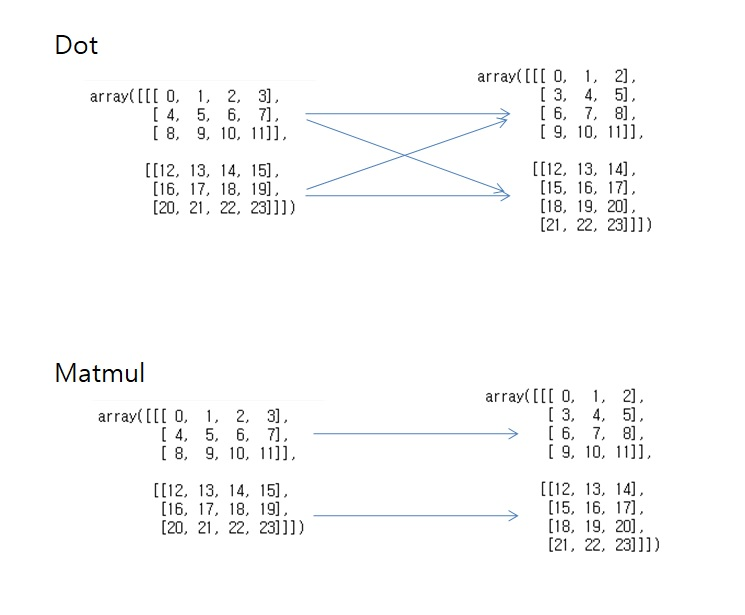

In [ ]:
# n차 텐서와 n차 텐서 간 dot 곱 결과의 차원은 2 * (n-1) 이다.
# 10차원...
# 그러니깐 arange로 ..?

x=10
A = np.arange(2*3*2*5*13*x).reshape((2,3,2,5,13,x))
B =np.arange(7*22*9*6*x*3).reshape((7,22,9,6,x,3))
np.dot(A,B).shape

### 외적

두 벡터로 만들어지는 면의 시계 방향 수직 벡터로 외적의 크기는 두 벡터로 만들어지는 평행사변형 면적과 같다.
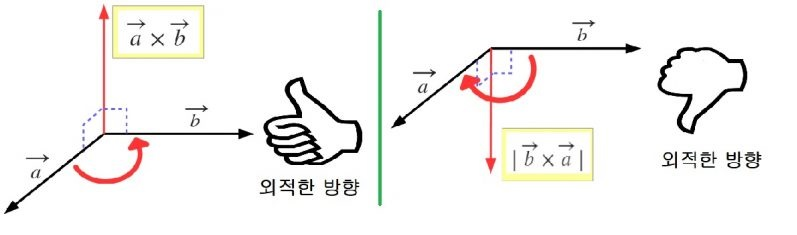

In [601]:
# 다차원에서는 외적이 불가능하다...
# 4차원 이상은 알 수 없다.
# x,y,z 축만 가능... 외적할때는

n=3
m=3

A = np.arange(n*m).reshape((n,m))
A

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [602]:
B =np.arange(n*m).reshape((n,m))
B

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [603]:
X=5
Y=0
np.cross(A+X,B+Y)

array([[  5, -10,   5],
       [  5, -10,   5],
       [  5, -10,   5]])

In [604]:
x = [1, 2, 3]
y = [4, 5, 6]
np.cross(x, y)

array([-3,  6, -3])

In [605]:
x = [4, 5, 6]
y = [1, 2, 3]
np.cross(x, y)

array([ 3, -6,  3])

In [606]:
x = np.array([[1,2,3], [4,5,6]])
x

array([[1, 2, 3],
       [4, 5, 6]])

In [607]:
y = np.array([[4,5,6], [1,2,3]])
y

array([[4, 5, 6],
       [1, 2, 3]])

In [608]:
np.cross(x, y)

array([[-3,  6, -3],
       [ 3, -6,  3]])

In [609]:
x = np.array([[1,2,3], [4,5,6], [7, 8, 9]])
x

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [610]:
y = np.array([[7, 8, 9], [4,5,6], [1,2,3]])
y

array([[7, 8, 9],
       [4, 5, 6],
       [1, 2, 3]])

In [611]:
np.cross(x, y)

array([[ -6,  12,  -6],
       [  0,   0,   0],
       [  6, -12,   6]])

### 전치행렬
 행렬의 행과 열을 바꿔 행렬의 "축"을 바꾸는 것
 - row , column 축을 바꾼다

In [612]:
A = np.arange(2*3).reshape(2,3)
A

array([[0, 1, 2],
       [3, 4, 5]])

In [613]:
np.transpose(A)

array([[0, 3],
       [1, 4],
       [2, 5]])

In [615]:
A.T

array([[0, 3],
       [1, 4],
       [2, 5]])

In [617]:
# 축이 바껴서 2,3 차원이 3,2 차원으로 바뀐 것을 확인할 수 있다.
A.shape, A.T.shape

((2, 3), (3, 2))

In [618]:
A = np.arange(2*3*4).reshape(2,3,4)
A

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

In [619]:
np.transpose(A)

array([[[ 0, 12],
        [ 4, 16],
        [ 8, 20]],

       [[ 1, 13],
        [ 5, 17],
        [ 9, 21]],

       [[ 2, 14],
        [ 6, 18],
        [10, 22]],

       [[ 3, 15],
        [ 7, 19],
        [11, 23]]])

In [622]:
# T = transpose 

A.T

array([[[ 0, 12],
        [ 4, 16],
        [ 8, 20]],

       [[ 1, 13],
        [ 5, 17],
        [ 9, 21]],

       [[ 2, 14],
        [ 6, 18],
        [10, 22]],

       [[ 3, 15],
        [ 7, 19],
        [11, 23]]])

In [623]:
A.shape, A.T.shape

((2, 3, 4), (4, 3, 2))

## 행렬식과 역행렬 구하기

      행렬식이 0 이면 역행렬이 없습니다. 

#### 행렬식, 역행렬 등을 구하는 모듈은 linalg 에 정의되어 있습니다.

In [624]:
import numpy.linalg as LA 

In [625]:
dir(LA)

['LinAlgError',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_umath_linalg',
 'cholesky',
 'cond',
 'det',
 'eig',
 'eigh',
 'eigvals',
 'eigvalsh',
 'inv',
 'lapack_lite',
 'linalg',
 'lstsq',
 'matrix_power',
 'matrix_rank',
 'multi_dot',
 'norm',
 'pinv',
 'qr',
 'slogdet',
 'solve',
 'svd',
 'tensorinv',
 'tensorsolve',
 'test']

#### 행렬식 구하기
 연립 방정식의 해답이 유일한지 아닌지를 판단하는 공식을 행렬식이라고 한다. 행렬식의 값이 0이라는 뜻은 연립 방정식의 해답이 무한함을 의미한다.
 
 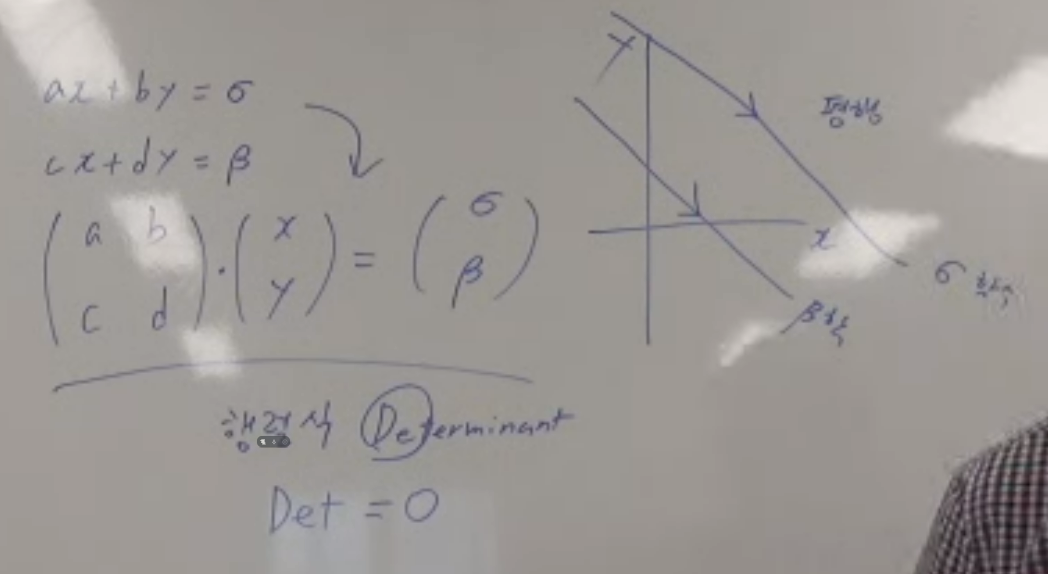

연립방정식의 해답이 무한한 경우의 예로 아래의 그림과 같은 연립방정식에서 ad - bc = 0 일 경우이다.
해의 유일성 유무를 기하학적으로 표현하면 각 차원 공간의 방향성이 있는 부피를 의미한다. 
예를 들어 1차원에선 길이, 2차원에선 넓이, 3차원에선 부피로 각 차원에 해당하는 값이 행렬식의 값이 된다.  
행렬식의 값이 0인 경우 역행렬은 존재하지 않는다.

- 평행의 의미 : 무한한 수를 구하는 것.. 시그마와 베타의 합이 0일때, 즉 : Det = 0

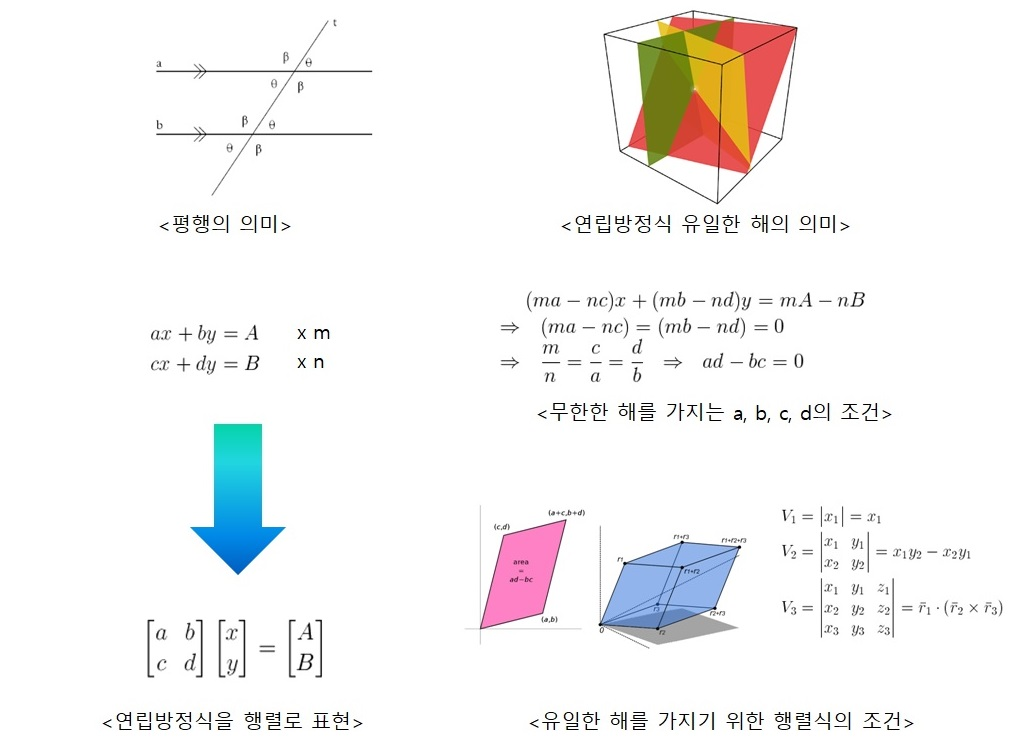

- 만약 tensor 2차원, tensor 3차원이면
- a,b,c,d 가 2차원의 면적을 나타내는 것이고, 
- ad-bc = 0, if 면적 둘레 : ad-bc != 0

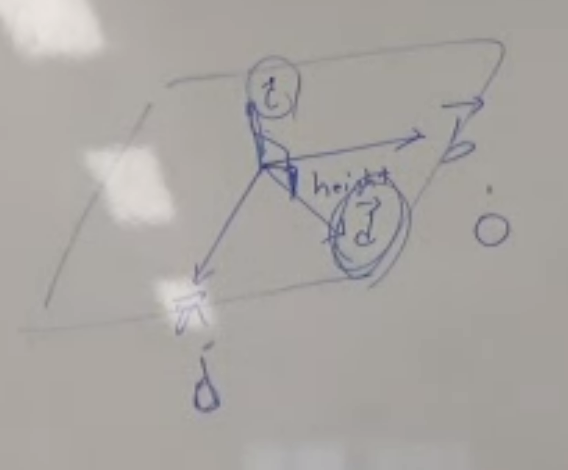
- 연립방정식에 해답이 있는지 없는지 확인하는 것이 행렬식이다.

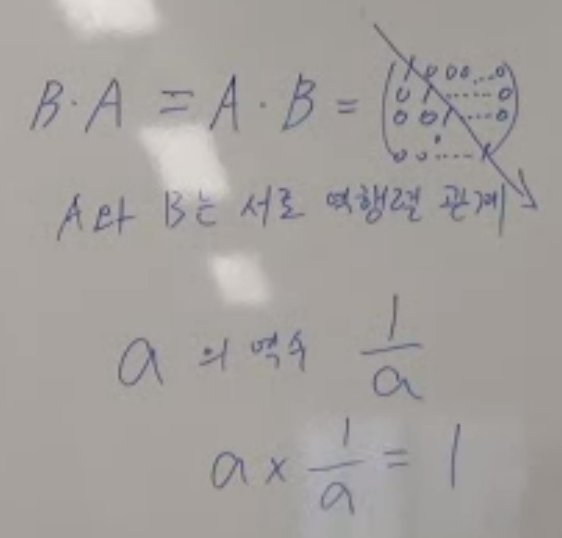

- 행렬의 1은 I다

In [627]:
A = np.arange(1,5).reshape(2,2)
A

array([[1, 2],
       [3, 4]])

In [628]:
# 행렬식 값 구하기
LA.det(A)

-2.0000000000000004

#### 랭크는 이 행렬에 수직인 경우가 없다는 것을 알 수 있습니다

In [629]:
LA.matrix_rank(A)

2

#### 역행렬 구하기

행렬과 역행렬을 곱하면 단위행렬(I로 표기)이 나온다.
해렬과 역행렬은 곱하는 순서가 바뀌어도 단위행렬이 나온다.
어떤 실수 A의 역수는 1/A로 둘의 곱이 1이 나오는 것처럼 역행렬은 행렬의 역 값이다.
2X2 행렬의 역행렬 공식에서 알 수 있듯이 행렬식 값이 0이면 역행렬은 존재하지 않는다.

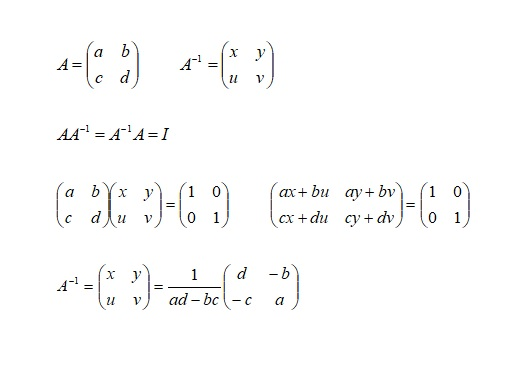

In [632]:
A

array([[1, 2],
       [3, 4]])

In [634]:
# 행렬식 값이 아니라서 역행렬을 권장한다.

LA.det(A)

-2.0000000000000004

In [630]:
LA.inv(A)

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

In [631]:
# 역행렬이 존재할 경우 무어-펜로즈 유사역행렬값과 같음.
LA.pinv(A)

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

### 정방행렬도 행렬식이 0이면 역행렬이 존재하지 않음

In [635]:
D = np.array([[1,0,1],[-2,-3,1],[3,3,0]])
D

array([[ 1,  0,  1],
       [-2, -3,  1],
       [ 3,  3,  0]])

In [636]:
D.shape

(3, 3)

In [640]:
LA_inv(D)

NameError: name 'LA_inv' is not defined

In [638]:
LA.det(D)

0.0

In [648]:
try :
    LA.inv(D)
except Exception as e :
    print("역행렬 없음")

역행렬 없음


In [649]:
A = np.earange(r*c).reshape(2,5)

AttributeError: module 'numpy' has no attribute 'earange'

In [655]:
# 행과 열이 같은 경우 정방행렬이라고 하고,
# 행렬식 계산이 가능하다.
# 정방행렬만 역행렬이 존재한다.

r = 2
c = 4
A = np.arange(r*c).reshape(r, c)
A

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [656]:
LA.det(A)

-2.9582283945787796e-30

In [658]:
LA.inv(D)

LinAlgError: Singular matrix

#### 역행렬이 없는 경우 무어-펜로즈 유사역행렬(의사 역행렬)을 사용한다. 정방행렬이 아니라도 의사 역행렬을 구할 수 있다.

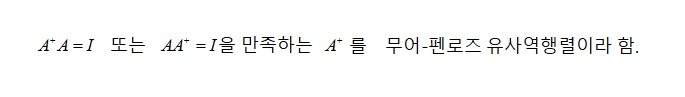

In [666]:
r = 2
c = 3
A = np.arange(r*c).reshape(r, c)
LA.pinv(A)

array([[-0.77777778,  0.27777778],
       [-0.11111111,  0.11111111],
       [ 0.55555556, -0.05555556]])

In [667]:
LA.pinv(D)

array([[ 0.25925926,  0.07407407,  0.18518519],
       [-0.14814815, -0.18518519,  0.03703704],
       [ 0.40740741,  0.25925926,  0.14814815]])

#### 정방행렬이 아니면 역행렬을 구할 수 없지만 의사 역행렬로 처리

In [683]:
# B는 C의 의사 역행렬
A = np.random.randn(9, 6)
A_ = LA.pinv(A)

In [684]:
A

array([[-0.3777709 , -0.01681357, -0.17493452,  0.13132596,  1.38233791,
         0.66265368],
       [ 0.98512799, -0.61885253,  0.3724741 , -0.72276027,  1.73060553,
        -0.19059865],
       [ 0.36196498, -0.79420093,  0.10254047,  0.61898306,  0.71142992,
         1.77555023],
       [ 0.26861989,  0.35281348, -0.02081888,  0.78346359,  1.44765495,
         0.21661468],
       [-0.14899477,  1.09563137,  2.37841841,  0.69002739, -0.18483559,
         0.00332588],
       [ 0.77107047,  0.18592425, -1.90839804,  1.14047317, -0.18700758,
         0.71469766],
       [-0.37048666,  0.76717121,  0.94069072,  0.34662085, -0.7479747 ,
         1.16928681],
       [-0.05271965, -1.58300139, -3.09840092, -2.0055831 ,  1.55515579,
        -0.06763273],
       [ 0.42586277,  0.78751679,  2.74365345, -1.41645664,  0.17368708,
         1.60750687]])

In [685]:
A_

array([[-0.38656669,  0.3873187 , -0.03068889, -0.01061174, -0.07307086,
         0.41338427, -0.18789254, -0.13383083,  0.18800402],
       [ 0.14783979, -0.1201093 , -0.57500543,  0.30443266,  0.10720699,
         0.35641168,  0.15980203,  0.08670786,  0.24763436],
       [-0.03833937,  0.0987101 ,  0.14857442, -0.06432492,  0.07025369,
        -0.21699797, -0.05662461, -0.12929883,  0.00415051],
       [ 0.04519989,  0.00108235,  0.21783467,  0.08019214,  0.05712822,
         0.01141399, -0.03767859, -0.19705128, -0.25599291],
       [ 0.24966404,  0.1022521 , -0.05031792,  0.26354556,  0.09727126,
        -0.05639319, -0.03115044,  0.07703185, -0.01995841],
       [ 0.08728172, -0.1263807 ,  0.21878491, -0.03036016, -0.06301327,
         0.10635422,  0.18314615,  0.06719436,  0.15600551]])

In [686]:
A.shape, A_.shape

((9, 6), (6, 9))

#### 행렬과 역행렬로 처리한 것이 원래 행렬과 동일한 지 확인 

B는 C의 의사역행렬이다. C는 B의 의사역행렬인가? 아래의 식이 맞는지 확인해 보자.

A_는 A의 의사역행렬이다. A는 A_의 의사역행렬인가? 아래의 식이 맞는지 확인해 보자.
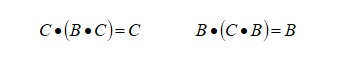

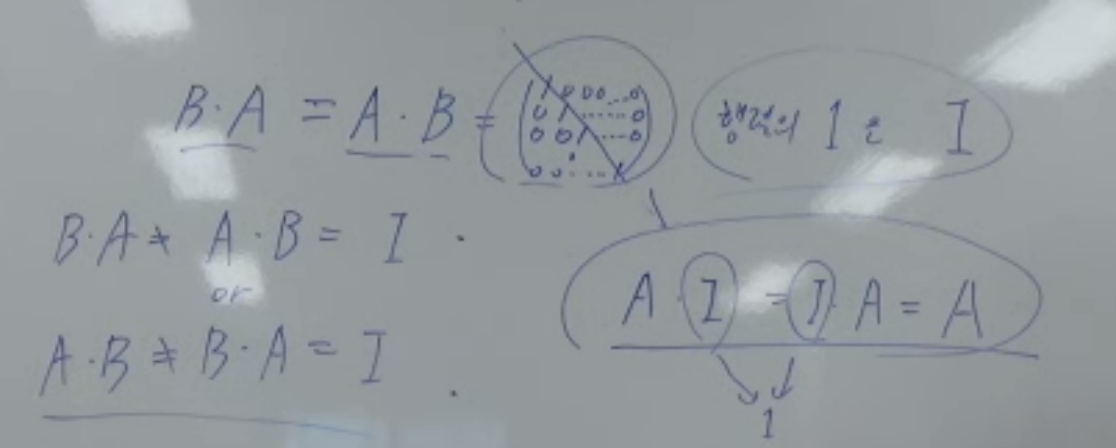

In [687]:
# B와 C의 내적은 단위행렬이 나옴.
I = np.dot(A_, A)
I

array([[ 1.00000000e+00,  4.94939816e-15, -1.13425474e-15,
        -8.92679959e-16,  1.16845551e-15,  1.85090708e-16],
       [-1.86720271e-16,  1.00000000e+00,  9.80290584e-16,
         3.26859755e-16,  1.23969158e-15, -2.08854937e-16],
       [ 4.17083395e-17,  1.27808535e-16,  1.00000000e+00,
        -1.51818153e-16,  1.64553461e-16,  9.58782528e-17],
       [ 7.05407977e-17, -1.08045730e-16, -9.76487635e-16,
         1.00000000e+00, -1.17487506e-16,  2.64925115e-17],
       [-3.29993277e-16, -1.71354180e-15,  2.17554904e-16,
         4.37814126e-16,  1.00000000e+00, -1.28329342e-16],
       [-1.37862896e-16, -5.22974837e-16, -4.59952984e-17,
         1.90867462e-16, -3.87066039e-16,  1.00000000e+00]])

In [690]:
# A와 단위행렬의 내적은 A가 도출됨.
np.dot(A, I)

array([[-0.3777709 , -0.01681357, -0.17493452,  0.13132596,  1.38233791,
         0.66265368],
       [ 0.98512799, -0.61885253,  0.3724741 , -0.72276027,  1.73060553,
        -0.19059865],
       [ 0.36196498, -0.79420093,  0.10254047,  0.61898306,  0.71142992,
         1.77555023],
       [ 0.26861989,  0.35281348, -0.02081888,  0.78346359,  1.44765495,
         0.21661468],
       [-0.14899477,  1.09563137,  2.37841841,  0.69002739, -0.18483559,
         0.00332588],
       [ 0.77107047,  0.18592425, -1.90839804,  1.14047317, -0.18700758,
         0.71469766],
       [-0.37048666,  0.76717121,  0.94069072,  0.34662085, -0.7479747 ,
         1.16928681],
       [-0.05271965, -1.58300139, -3.09840092, -2.0055831 ,  1.55515579,
        -0.06763273],
       [ 0.42586277,  0.78751679,  2.74365345, -1.41645664,  0.17368708,
         1.60750687]])

In [328]:
C

array([[ 0.52059946, -0.6865724 ,  0.38770075,  0.11317857, -1.49618212,
         0.91665672],
       [ 1.28443158,  0.81203143,  1.67826272,  2.05165026,  0.71869976,
         0.9939171 ],
       [-1.65921755, -1.32558915, -0.62300371, -1.22544079,  1.11476954,
         0.39423558],
       [ 0.63713955, -0.15340396, -0.4995915 , -1.19483218, -0.74125278,
        -2.23393433],
       [-1.62694958, -1.85969786,  1.16105952, -1.28971777,  0.0308661 ,
         0.32332323],
       [ 0.6801012 , -1.14178824,  0.22950655, -0.78210231,  0.26106355,
        -0.36364352],
       [-0.64765691, -0.09100477, -0.07743832,  1.39082784,  1.61440657,
        -0.54305648],
       [ 0.1418767 ,  0.80390409,  0.55918976, -0.77919823,  0.17247953,
        -0.68050755],
       [ 1.0230892 , -0.29756235, -1.62794731, -0.53502293,  1.40524205,
         0.27288013]])

In [691]:
# A와 np.dot(A, np.dot(A_, A))은 허용오차 범위 내에 같은 값
np.allclose(C, np.dot(C, np.dot(B, C)))

True

In [692]:
A - np.dot(A, np.dot(A_, A))

array([[ 9.99200722e-16,  4.60048666e-15, -7.21644966e-16,
        -1.13797860e-15,  6.66133815e-16,  2.22044605e-16],
       [-6.66133815e-16, -2.88657986e-15,  9.99200722e-16,
         5.55111512e-16, -4.44089210e-16, -1.11022302e-16],
       [-1.66533454e-16, -5.55111512e-16,  1.83186799e-15,
        -2.22044605e-16,  1.33226763e-15, -2.22044605e-16],
       [ 2.77555756e-16,  1.83186799e-15,  3.98986399e-16,
        -6.66133815e-16, -6.66133815e-16,  1.94289029e-16],
       [ 1.38777878e-16,  1.55431223e-15,  2.22044605e-15,
        -2.22044605e-16, -1.49880108e-15, -1.34441069e-17],
       [-8.88178420e-16, -3.19189120e-15,  0.00000000e+00,
        -2.22044605e-16, -4.16333634e-16,  0.00000000e+00],
       [ 4.44089210e-16,  1.99840144e-15,  2.22044605e-16,
        -3.88578059e-16, -2.22044605e-16,  0.00000000e+00],
       [ 5.34294831e-16,  1.11022302e-15, -3.99680289e-15,
        -4.44089210e-16,  2.22044605e-15,  2.22044605e-16],
       [-5.55111512e-17, -3.33066907e-16,  1.332

In [331]:
# C의 의사역행렬인 B의 의사역행렬은 C임을 알수 있다.
C - np.linalg.pinv(B)

array([[ 4.44089210e-16, -1.11022302e-15,  6.10622664e-16,
        -6.66133815e-16, -1.77635684e-15, -7.77156117e-16],
       [-2.22044605e-16, -2.22044605e-16, -8.88178420e-16,
        -4.44089210e-16, -1.22124533e-15, -1.11022302e-16],
       [-1.11022302e-15, -8.88178420e-16, -1.55431223e-15,
        -2.66453526e-15, -2.22044605e-16, -8.88178420e-16],
       [-7.77156117e-16,  6.93889390e-16,  5.55111512e-17,
         1.99840144e-15,  2.22044605e-16,  1.33226763e-15],
       [-1.99840144e-15, -2.22044605e-16, -2.44249065e-15,
        -1.11022302e-15, -6.66133815e-16,  9.99200722e-16],
       [-9.99200722e-16,  4.44089210e-16, -1.22124533e-15,
         7.77156117e-16, -6.10622664e-16,  8.88178420e-16],
       [ 1.11022302e-16,  1.13797860e-15, -1.44328993e-15,
         4.44089210e-16,  6.66133815e-16,  3.33066907e-16],
       [-1.38777878e-16,  7.77156117e-16,  7.77156117e-16,
         1.77635684e-15, -1.94289029e-16,  1.44328993e-15],
       [ 2.22044605e-16, -2.77555756e-16, -4.440

In [332]:
E = np.dot(C, B)
E

array([[ 0.55763174,  0.00596913, -0.15066224, -0.05172467,  0.06918223,
         0.12099413, -0.25068933, -0.36562064, -0.0729318 ],
       [ 0.00596913,  0.77077017, -0.23995737, -0.23458226,  0.01900614,
         0.1873216 ,  0.11759688,  0.12138759,  0.00499216],
       [-0.15066224, -0.23995737,  0.4806239 , -0.20656356,  0.29753153,
         0.0012041 ,  0.0683257 , -0.01695299,  0.18219537],
       [-0.05172467, -0.23458226, -0.20656356,  0.73570789, -0.04227   ,
         0.27524641,  0.07868997,  0.08113466, -0.06121051],
       [ 0.06918223,  0.01900614,  0.29753153, -0.04227   ,  0.68645295,
         0.24972204, -0.01011507,  0.06538512, -0.23029871],
       [ 0.12099413,  0.1873216 ,  0.0012041 ,  0.27524641,  0.24972204,
         0.54107566,  0.01168816, -0.01339407,  0.24524413],
       [-0.25068933,  0.11759688,  0.0683257 ,  0.07868997, -0.01011507,
         0.01168816,  0.79585457, -0.26284096, -0.0749072 ],
       [-0.36562064,  0.12138759, -0.01695299,  0.08113466,  0

In [333]:
np.dot(B, E)

array([[ 0.08679909,  0.16362617, -0.10546006,  0.08957836, -0.05105175,
         0.22346047, -0.09639507,  0.01735642,  0.20786356],
       [-0.21220493, -0.01392804, -0.01266801, -0.12765187, -0.14107832,
        -0.25061722, -0.1953757 ,  0.31216906, -0.0403012 ],
       [-0.05633889,  0.22924506, -0.04039613,  0.00917837,  0.20127393,
         0.11026937, -0.04385549,  0.22020527, -0.14189434],
       [ 0.10830099,  0.01945218, -0.09159489,  0.03597546, -0.08260895,
        -0.03258254,  0.31427993, -0.31655781, -0.11733785],
       [-0.20030026,  0.14621502,  0.10531503, -0.05350019,  0.04549356,
         0.08947946,  0.09049713,  0.15082193,  0.17170963],
       [ 0.08361881,  0.04244454,  0.08633697, -0.29856052, -0.00187484,
        -0.07919262, -0.23761615,  0.01721601,  0.12696836]])

In [334]:
B

array([[ 0.08679909,  0.16362617, -0.10546006,  0.08957836, -0.05105175,
         0.22346047, -0.09639507,  0.01735642,  0.20786356],
       [-0.21220493, -0.01392804, -0.01266801, -0.12765187, -0.14107832,
        -0.25061722, -0.1953757 ,  0.31216906, -0.0403012 ],
       [-0.05633889,  0.22924506, -0.04039613,  0.00917837,  0.20127393,
         0.11026937, -0.04385549,  0.22020527, -0.14189434],
       [ 0.10830099,  0.01945218, -0.09159489,  0.03597546, -0.08260895,
        -0.03258254,  0.31427993, -0.31655781, -0.11733785],
       [-0.20030026,  0.14621502,  0.10531503, -0.05350019,  0.04549356,
         0.08947946,  0.09049713,  0.15082193,  0.17170963],
       [ 0.08361881,  0.04244454,  0.08633697, -0.29856052, -0.00187484,
        -0.07919262, -0.23761615,  0.01721601,  0.12696836]])

In [335]:
# B와 np.dot(B, np.dot(C, B))은 허용오차 범위 내에 같은 값
np.allclose(B, np.dot(B, np.dot(C, B)))

True

In [336]:
# B 대신 C로 바꾸면 아래와 같이 내적을 할 수 없음. 
np.dot(C, np.dot(C, B))

ValueError: shapes (9,6) and (9,9) not aligned: 6 (dim 1) != 9 (dim 0)

In [337]:
# 반대의 경우도 내적을 할 수 없음.
np.dot(B, np.dot(B, C))

ValueError: shapes (6,9) and (6,6) not aligned: 9 (dim 1) != 6 (dim 0)

## 문제 풀이

1. 아래와 같은 결과가 나오도록 코드를 작성하세요.
```
array([[[ 11,   9,  31],
        [ 13,   9,   6]],

       [[  2,   5, 192],
        [  1, 199, 212]]])
```

In [784]:
a = np.array([[[11,9,31],[13,9,6]],[[2,5,192],[1,199,212]]])

In [785]:
a

array([[[ 11,   9,  31],
        [ 13,   9,   6]],

       [[  2,   5, 192],
        [  1, 199, 212]]])

2. 위 array 값을 활용하여 3 보다 큰 값만 도출하는 논리검색을 통해 array를 도출해보세요.
```
array([ 11,   9,  31,  13,   9,   6,   5, 192, 199, 212])
```

In [795]:
b = a[a > 3]

In [802]:
b

array([  1,   2,   3,  13,   9,   6,   5, 192, 199, 212])

3. 위 array를 활용하여 특정 index의 원소 값을 치환하여 아래 array를 도출해보세요.
```
array([  1,   2,   3,  13,   9,   6,   5, 192, 199, 212])
```

In [803]:
b[0:3] = [1,2,3]

In [804]:
b

array([  1,   2,   3,  13,   9,   6,   5, 192, 199, 212])

4. 위 array를 활용하여 팬시검색을 통해 아래 array를 도출해보세요.
```
array([  2,   1,   6,   5, 212])
```

In [807]:
d = [1, 0, 5, 6, 9]

In [808]:
b[d]

array([  2,   1,   6,   5, 212])

In [809]:
c = b[[1, 0, 5, 6, 9]]

In [810]:
c

array([  2,   1,   6,   5, 212])

5. arange와 reshape을 활용하여 아래 array를 도출해보세요.
```
array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17]])
```

In [824]:
e = np.arange(18)

In [826]:
e.reshape(3, 6)

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17]])

6. 위 array를 활용하여 아래 array를 도출해보세요.
```
array([[ 0,  2,  4,  6,  8, 10],
       [12, 14, 16, 18, 20, 22],
       [24, 26, 28, 30, 32, 34]])
```

In [875]:
f = np.arange(0,35,2).reshape(3,6)

In [876]:
f

array([[ 0,  2,  4,  6,  8, 10],
       [12, 14, 16, 18, 20, 22],
       [24, 26, 28, 30, 32, 34]])

7. 아래 array를 도출해보세요.
```
array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])
```

In [879]:
n = 6
m = 5

g = np.zeros((n,m))
g

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

8. 위 array를 활용하여 아래 array를 도출해보세요.
```
array([[0., 1., 0., 0., 1.],
       [1., 0., 1., 0., 1.],
       [0., 1., 0., 0., 1.],
       [1., 0., 1., 0., 1.],
       [0., 1., 0., 0., 1.],
       [1., 0., 1., 0., 1.]])
```

In [884]:
g[0,1::3]=1
g[1,0::2]=1
g[2,1::3]=1
g[3,0::2]=1
g[4,1::3]=1
g[5,0::2]=1

g

array([[0., 1., 0., 0., 1.],
       [1., 0., 1., 0., 1.],
       [0., 1., 0., 0., 1.],
       [1., 0., 1., 0., 1.],
       [0., 1., 0., 0., 1.],
       [1., 0., 1., 0., 1.]])

9. 아래 array를 도출해보세요.
```
array([[1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.]])
```

In [892]:
h = np.ones((7,7))
h

array([[1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.]])

10. 위 array를 활용하여 아래 array를 도출해보세요.
```
array([[1., 1., 1., 1., 1., 1., 1.],
       [1., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 1.],
       [1., 1., 1., 1., 1., 1., 1.]])
```

In [893]:
h[1:6,1:6]=0

In [894]:
h

array([[1., 1., 1., 1., 1., 1., 1.],
       [1., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 1.],
       [1., 1., 1., 1., 1., 1., 1.]])

11. 아래 두 array의 내적을 해 내적값을 도출해보세요.
```
array([2, 3, 4, 5, 6, 7])
array([ 5,  6,  7,  8,  9, 10])
내적값:220
```

In [903]:
a1 = np.array([2,3,4,5,6,7])
a2 = np.array([5,6,7,8,9,10])

print("dot 연산 내적값 :", np.dot(a1, a2))
print("inner 연산 내적값 :", np.inner(a1, a2))

dot 연산 내적값 : 220
inner 연산 내적값 : 220


12. arange와 reshape을 활용하여 아래 두 array를 도출하고 두 array의 내적을 해 내적값을 도출해보세요.
```
array([[ 0,  1,  2,  3,  4,  5,  6],
       [ 7,  8,  9, 10, 11, 12, 13],
       [14, 15, 16, 17, 18, 19, 20],
       [21, 22, 23, 24, 25, 26, 27],
       [28, 29, 30, 31, 32, 33, 34],
       [35, 36, 37, 38, 39, 40, 41]])
```
```
array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35],
       [36, 37, 38, 39, 40, 41]])
```
내적값

```
array([[ 546,  567,  588,  609,  630,  651],
       [1428, 1498, 1568, 1638, 1708, 1778],
       [2310, 2429, 2548, 2667, 2786, 2905],
       [3192, 3360, 3528, 3696, 3864, 4032],
       [4074, 4291, 4508, 4725, 4942, 5159],
       [4956, 5222, 5488, 5754, 6020, 6286]])
```

In [933]:
b1 = np.arange(42).reshape(6,7)
b2 = np.arange(42).reshape(7,6)
b1, b2

(array([[ 0,  1,  2,  3,  4,  5,  6],
        [ 7,  8,  9, 10, 11, 12, 13],
        [14, 15, 16, 17, 18, 19, 20],
        [21, 22, 23, 24, 25, 26, 27],
        [28, 29, 30, 31, 32, 33, 34],
        [35, 36, 37, 38, 39, 40, 41]]),
 array([[ 0,  1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10, 11],
        [12, 13, 14, 15, 16, 17],
        [18, 19, 20, 21, 22, 23],
        [24, 25, 26, 27, 28, 29],
        [30, 31, 32, 33, 34, 35],
        [36, 37, 38, 39, 40, 41]]))

In [934]:
np.dot(b1,b2)

array([[ 546,  567,  588,  609,  630,  651],
       [1428, 1498, 1568, 1638, 1708, 1778],
       [2310, 2429, 2548, 2667, 2786, 2905],
       [3192, 3360, 3528, 3696, 3864, 4032],
       [4074, 4291, 4508, 4725, 4942, 5159],
       [4956, 5222, 5488, 5754, 6020, 6286]])

13. arange와 reshape을 활용하여 아래 두 array를 도출하고 두 array의 내적을 해 내적값을 도출해보세요.
```
array([[[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14]],

       [[15, 16, 17, 18, 19],
        [20, 21, 22, 23, 24],
        [25, 26, 27, 28, 29]]])
```
```
array([[[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11],
        [12, 13, 14]],

       [[15, 16, 17],
        [18, 19, 20],
        [21, 22, 23],
        [24, 25, 26],
        [27, 28, 29]]])
```
내적값
```
array([[[[  90,  100,  110],
         [ 240,  250,  260]],

        [[ 240,  275,  310],
         [ 765,  800,  835]],

        [[ 390,  450,  510],
         [1290, 1350, 1410]]],

       [[[ 540,  625,  710],
         [1815, 1900, 1985]],

        [[ 690,  800,  910],
         [2340, 2450, 2560]],

        [[ 840,  975, 1110],
         [2865, 3000, 3135]]]])
```

In [944]:
c1 = np.arange(30).reshape(2,3,5)
c2 = np.arange(30).reshape(2,5,3)

In [945]:
c1, c2

(array([[[ 0,  1,  2,  3,  4],
         [ 5,  6,  7,  8,  9],
         [10, 11, 12, 13, 14]],
 
        [[15, 16, 17, 18, 19],
         [20, 21, 22, 23, 24],
         [25, 26, 27, 28, 29]]]),
 array([[[ 0,  1,  2],
         [ 3,  4,  5],
         [ 6,  7,  8],
         [ 9, 10, 11],
         [12, 13, 14]],
 
        [[15, 16, 17],
         [18, 19, 20],
         [21, 22, 23],
         [24, 25, 26],
         [27, 28, 29]]]))

In [946]:
np.dot(c1,c2)

array([[[[  90,  100,  110],
         [ 240,  250,  260]],

        [[ 240,  275,  310],
         [ 765,  800,  835]],

        [[ 390,  450,  510],
         [1290, 1350, 1410]]],


       [[[ 540,  625,  710],
         [1815, 1900, 1985]],

        [[ 690,  800,  910],
         [2340, 2450, 2560]],

        [[ 840,  975, 1110],
         [2865, 3000, 3135]]]])

14. 위 두 array를 활용하여 matmul을 해보세요.

matmul 결과
```
array([[[  90,  100,  110],
        [ 240,  275,  310],
        [ 390,  450,  510]],

       [[1815, 1900, 1985],
        [2340, 2450, 2560],
        [2865, 3000, 3135]]])
```

In [947]:
c3 = np.matmul(c1,c2)

In [948]:
c3

array([[[  90,  100,  110],
        [ 240,  275,  310],
        [ 390,  450,  510]],

       [[1815, 1900, 1985],
        [2340, 2450, 2560],
        [2865, 3000, 3135]]])

15. 아래 두 array를 외적을 해보세요.
```
array([[12,  0,  4],
       [ 3,  9, 66],
       [ 1,  7,  8]])
```
```
array([[ 55,  21,   3],
       [  8,  43,   7],
       [109,  22,  76]])
```

외적값
```
array([[  -84,   184,   252],
       [-2775,   507,    57],
       [  356,   796,  -741]])
```

In [951]:
d1 = np.array([[12,0,4],[3,9,66],[1,7,8]])
d2 = np.array([[55,21,3],[8,43,7],[109,22,76]])

d1, d2

(array([[12,  0,  4],
        [ 3,  9, 66],
        [ 1,  7,  8]]),
 array([[ 55,  21,   3],
        [  8,  43,   7],
        [109,  22,  76]]))

In [954]:
d3 = np.cross(d1,d2)

d3

array([[  -84,   184,   252],
       [-2775,   507,    57],
       [  356,   796,  -741]])

16. arange와 reshape을 활용해 아래 array를 만들고 전치행렬을 도출해보세요.
```
array([[[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11]],

       [[12, 13, 14],
        [15, 16, 17],
        [18, 19, 20],
        [21, 22, 23]]])
```

전치행렬
```
array([[[ 0, 12],
        [ 3, 15],
        [ 6, 18],
        [ 9, 21]],

       [[ 1, 13],
        [ 4, 16],
        [ 7, 19],
        [10, 22]],

       [[ 2, 14],
        [ 5, 17],
        [ 8, 20],
        [11, 23]]])
```

In [959]:
e1 = np.arange(24).reshape(2,4,3)

E = e1

E

array([[[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11]],

       [[12, 13, 14],
        [15, 16, 17],
        [18, 19, 20],
        [21, 22, 23]]])

In [960]:
E.T

array([[[ 0, 12],
        [ 3, 15],
        [ 6, 18],
        [ 9, 21]],

       [[ 1, 13],
        [ 4, 16],
        [ 7, 19],
        [10, 22]],

       [[ 2, 14],
        [ 5, 17],
        [ 8, 20],
        [11, 23]]])

In [961]:
np.transpose(E)

array([[[ 0, 12],
        [ 3, 15],
        [ 6, 18],
        [ 9, 21]],

       [[ 1, 13],
        [ 4, 16],
        [ 7, 19],
        [10, 22]],

       [[ 2, 14],
        [ 5, 17],
        [ 8, 20],
        [11, 23]]])

17. 아래 행렬의 행렬식과 역행렬을 구하세요.
```
array([[0, 1],
       [2, 3]])
```
행렬식 : -2

역행렬
```
array([[-1.5,  0.5],
       [ 1. ,  0. ]])
```

In [965]:
f = np.arange(4).reshape(2,2)

f

array([[0, 1],
       [2, 3]])

In [968]:
print("행렬식 :", LA.det(f))

행렬식 : -2.0


In [969]:
print("역행렬 :", LA.inv(f))

역행렬 : [[-1.5  0.5]
 [ 1.   0. ]]


18. arange와 reshap을 활용하여 array를 만들고 의사역행렬을 도출하세요
```
array([[0, 1, 2, 3],
       [4, 5, 6, 7]])
```
의사역행렬
```
array([[-0.475,  0.175],
       [-0.2  ,  0.1  ],
       [ 0.075,  0.025],
       [ 0.35 , -0.05 ]])
```

In [971]:
g = np.arange(8).reshape(2,4)
g

array([[0, 1, 2, 3],
       [4, 5, 6, 7]])

In [974]:
print("의사역행렬 :",LA.pinv(g))

의사역행렬 : [[-0.475  0.175]
 [-0.2    0.1  ]
 [ 0.075  0.025]
 [ 0.35  -0.05 ]]


In [981]:
data = np.arange(0,50,10)
data

array([ 0, 10, 20, 30, 40])

In [982]:
a = pd.Series(data, index=['a','b','c','d','e'])
a

a     0
b    10
c    20
d    30
e    40
dtype: int32

In [983]:
b = pd.Series(data)
b

0     0
1    10
2    20
3    30
4    40
dtype: int32

In [985]:
a['b']

10

In [986]:
a[1]

10

In [987]:
a.loc['b']

10

In [988]:
a.iloc[1]

10

In [989]:
a

a     0
b    10
c    20
d    30
e    40
dtype: int32

In [990]:
a + 10

a    10
b    20
c    30
d    40
e    50
dtype: int32

In [993]:
a + 10
a - 10
a * 10
a ** 2
a / 5
a // 5
a % 2

a    0
b    0
c    0
d    0
e    0
dtype: int32

In [994]:
a

a     0
b    10
c    20
d    30
e    40
dtype: int32

In [995]:
a > 15

a    False
b    False
c     True
d     True
e     True
dtype: bool

In [997]:
a[a > 15]

c    20
d    30
e    40
dtype: int32

In [998]:
a.add(100)

a    100
b    110
c    120
d    130
e    140
dtype: int32

In [999]:
a.sub(100)

a   -100
b    -90
c    -80
d    -70
e    -60
dtype: int32

In [1001]:
a.mul(100)

a       0
b    1000
c    2000
d    3000
e    4000
dtype: int32

In [1002]:
a.div(100)

a    0.0
b    0.1
c    0.2
d    0.3
e    0.4
dtype: float64

In [1004]:
# 나머지 연산 module
a.mod(3)

a    0
b    1
c    2
d    0
e    1
dtype: int32

In [5]:
tips = sns.load_dataset('tips')

In [6]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [14]:
# head를 쓰면 앞에서 5개만 사용한다.
tips.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [15]:
tips.tail(5)

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [22]:
tips.shape[0],tips.shape[1]

(244, 7)

In [26]:
# 간단한 자료 조회
# null, NaN이 없다는 것은 빈 값이 없다는 것. (모든 데이터에 빈 값이 없다.)
tips.info()
# null 이 있는지 확인함.
tips.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [28]:
# columns 의 종류를 확인함.
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [56]:
# 확인하고싶은 데이터만 확인함.
t_d = tips[['total_bill','tip','time']].copy()

In [57]:
t_d

,total_bill,tip,time
0,16.99,1.01,Dinner
1,10.34,1.66,Dinner
2,21.01,3.50,Dinner
3,23.68,3.31,Dinner
4,24.59,3.61,Dinner
...,...,...,...
239,29.03,5.92,Dinner
240,27.18,2.00,Dinner
241,22.67,2.00,Dinner
242,17.82,1.75,Dinner


In [58]:
tips['time'].unique()

['Dinner', 'Lunch']
Categories (2, object): ['Dinner', 'Lunch']

In [59]:
# loc는 index 값을 찾는다.
t_d.loc[0,'time'] = 'Lunch'

t_d

,total_bill,tip,time
0,16.99,1.01,Lunch
1,10.34,1.66,Dinner
2,21.01,3.50,Dinner
3,23.68,3.31,Dinner
4,24.59,3.61,Dinner
...,...,...,...
239,29.03,5.92,Dinner
240,27.18,2.00,Dinner
241,22.67,2.00,Dinner
242,17.82,1.75,Dinner


In [60]:
# 복사해서 써도 원본은 변하지 않는다.
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [64]:
# 원하는 값만 추출하는 조건값 = db이름[db이름['필드값']<조건>]
tips.loc[tips['tip']>5,'level'] = 'good'
tips

,total_bill,tip,sex,smoker,day,time,size,level
0,16.99,1.01,Female,No,Sun,Dinner,2,NaN
1,10.34,1.66,Male,No,Sun,Dinner,3,NaN
2,21.01,3.50,Male,No,Sun,Dinner,3,NaN
3,23.68,3.31,Male,No,Sun,Dinner,2,NaN
4,24.59,3.61,Female,No,Sun,Dinner,4,NaN
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,good
240,27.18,2.00,Female,Yes,Sat,Dinner,2,NaN
241,22.67,2.00,Male,Yes,Sat,Dinner,2,NaN
242,17.82,1.75,Male,No,Sat,Dinner,2,NaN


In [69]:
tips[tips['level']!='good']

,total_bill,tip,sex,smoker,day,time,size,level
0,16.99,1.01,Female,No,Sun,Dinner,2,bad
1,10.34,1.66,Male,No,Sun,Dinner,3,bad
2,21.01,3.50,Male,No,Sun,Dinner,3,bad
3,23.68,3.31,Male,No,Sun,Dinner,2,bad
4,24.59,3.61,Female,No,Sun,Dinner,4,bad
...,...,...,...,...,...,...,...,...
238,35.83,4.67,Female,No,Sat,Dinner,3,bad
240,27.18,2.00,Female,Yes,Sat,Dinner,2,bad
241,22.67,2.00,Male,Yes,Sat,Dinner,2,bad
242,17.82,1.75,Male,No,Sat,Dinner,2,bad


In [68]:
tips.loc[tips['tip']<=5,'level'] = 'bad'
tips

,total_bill,tip,sex,smoker,day,time,size,level
0,16.99,1.01,Female,No,Sun,Dinner,2,bad
1,10.34,1.66,Male,No,Sun,Dinner,3,bad
2,21.01,3.50,Male,No,Sun,Dinner,3,bad
3,23.68,3.31,Male,No,Sun,Dinner,2,bad
4,24.59,3.61,Female,No,Sun,Dinner,4,bad
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,good
240,27.18,2.00,Female,Yes,Sat,Dinner,2,bad
241,22.67,2.00,Male,Yes,Sat,Dinner,2,bad
242,17.82,1.75,Male,No,Sat,Dinner,2,bad


In [70]:
tips.iloc[:1]

,total_bill,tip,sex,smoker,day,time,size,level
0,16.99,1.01,Female,No,Sun,Dinner,2,bad


In [71]:
tips.loc[:1]

,total_bill,tip,sex,smoker,day,time,size,level
0,16.99,1.01,Female,No,Sun,Dinner,2,bad
1,10.34,1.66,Male,No,Sun,Dinner,3,bad


In [74]:
# 전치행렬 가능
 # = row , columns 위치 바꿈
tips.T

,0,1,2,3,4,5,6,7,8,9,...,234,235,236,237,238,239,240,241,242,243
total_bill,16.99,10.34,21.01,23.68,24.59,25.29,8.77,26.88,15.04,14.78,...,15.53,10.07,12.6,32.83,35.83,29.03,27.18,22.67,17.82,18.78
tip,1.01,1.66,3.5,3.31,3.61,4.71,2.0,3.12,1.96,3.23,...,3.0,1.25,1.0,1.17,4.67,5.92,2.0,2.0,1.75,3.0
sex,Female,Male,Male,Male,Female,Male,Male,Male,Male,Male,...,Male,Male,Male,Male,Female,Male,Female,Male,Male,Female
smoker,No,No,No,No,No,No,No,No,No,No,...,Yes,No,Yes,Yes,No,No,Yes,Yes,No,No
day,Sun,Sun,Sun,Sun,Sun,Sun,Sun,Sun,Sun,Sun,...,Sat,Sat,Sat,Sat,Sat,Sat,Sat,Sat,Sat,Thur
time,Dinner,Dinner,Dinner,Dinner,Dinner,Dinner,Dinner,Dinner,Dinner,Dinner,...,Dinner,Dinner,Dinner,Dinner,Dinner,Dinner,Dinner,Dinner,Dinner,Dinner
size,2,3,3,2,4,4,2,4,2,2,...,2,2,2,2,3,3,2,2,2,2
level,bad,bad,bad,bad,bad,bad,bad,bad,bad,bad,...,bad,bad,bad,bad,bad,good,bad,bad,bad,bad


In [79]:
# 전치행렬 해도 원본은 그대로이니다...
tips

,total_bill,tip,sex,smoker,day,time,size,level
0,16.99,1.01,Female,No,Sun,Dinner,2,bad
1,10.34,1.66,Male,No,Sun,Dinner,3,bad
2,21.01,3.50,Male,No,Sun,Dinner,3,bad
3,23.68,3.31,Male,No,Sun,Dinner,2,bad
4,24.59,3.61,Female,No,Sun,Dinner,4,bad
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,good
240,27.18,2.00,Female,Yes,Sat,Dinner,2,bad
241,22.67,2.00,Male,Yes,Sat,Dinner,2,bad
242,17.82,1.75,Male,No,Sat,Dinner,2,bad


In [88]:
# ratio를 새로 만드는데 계산서 에서 tip 을 나눈 값을 추출한다.

tips['ratio'] =  tips['total_bill'] - tips['tip']
tips

,total_bill,tip,sex,smoker,day,time,size,level,ratio
0,16.99,1.01,Female,No,Sun,Dinner,2,bad,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,bad,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,bad,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,bad,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,bad,20.98
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,good,23.11
240,27.18,2.00,Female,Yes,Sat,Dinner,2,bad,25.18
241,22.67,2.00,Male,Yes,Sat,Dinner,2,bad,20.67
242,17.82,1.75,Male,No,Sat,Dinner,2,bad,16.07


In [89]:
print("Bye Numpy, Pandas...")
print("오늘 몹시 어려웠따..")

Bye Numpy, Pandas...
오늘 몹시 어려웠따..
